$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 2: Neural Network Regression

Damian Armijo

## Overview

The goal of this assignment is to learn about object-oriented programming in python and to gain some experience in comparing different sized neural networks when applied to a data set.

Starting with the ```NeuralNetwork``` class from the lecture notes, you will create one new version of that class, apply it to a data set, and discuss the results.

## Required Code

Start with the ```NeuralNetwork``` class defined in lecture notes 09. Put that class definition as written into *neuralnetworks.py* into your current directory.  Also place *mlutilities.py* from lecture notes 09 in your current directory. If this is done correctly, then the following code should run and produce results similar to what is shown here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
import neuralnetworks as nn

X = np.arange(10).reshape((-1,1))
T = np.sin(X)

nnet = nn.NeuralNetwork(1, [10], 1)
nnet.train(X, T, 100, verbose=True)
nnet

SCG: Iteration 10 fValue Eval 0.427659418174 Scale 0.000512
SCG: Iteration 20 fValue Eval 0.186592011789 Scale 3.2e-05
SCG: Iteration 30 fValue Eval 0.0943266271895 Scale 0.002048
SCG: Iteration 40 fValue Eval 0.0592641427298 Scale 2e-06
SCG: Iteration 50 fValue Eval 0.0218659929053 Scale 1.5625e-08
SCG: Iteration 60 fValue Eval 0.00437698553138 Scale 1.52587890625e-11
SCG: Iteration 70 fValue Eval 0.00336652309626 Scale 1.4901161193847656e-14
SCG: Iteration 80 fValue Eval 0.00268955559233 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.00119767197019 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.000748308081345 Scale 1e-15


NeuralNetwork(1, [10], 1)
   Network was trained for 101 iterations that took 0.0655 seconds. Final error is 0.0273552203673199.

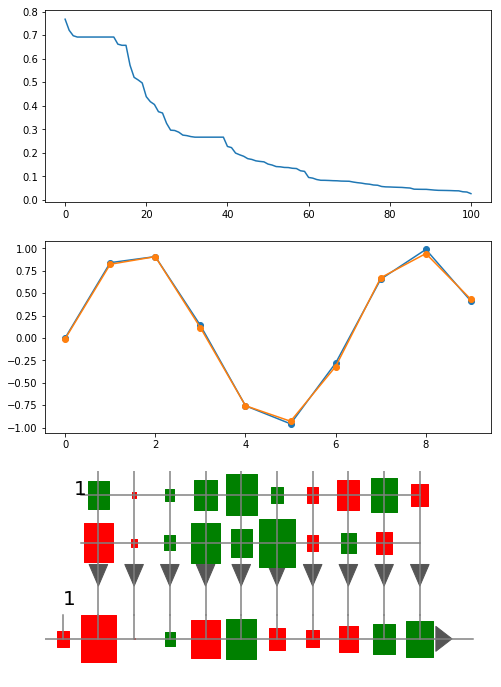

In [25]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

Now let's extract the parts of the neural network code that refer to the activation function and its derivative into two new methods.  Copy your file *neuralnetworks.py* into a new file named *neuralnetworks2.py*.  Modify the code in *neuralnetworksA2.py* by adding these two methods to the ```NeuralNetwork``` class:

    def activation(self, weighted_sum):
        return np.tanh(weighted_sum)
        
    def activationDerivative(self, activation_value):
        return 1 - activation_value * activation_value
        
Now replace the code in the appropriate places in the ```NeuralNetwork``` class so that ```np.tanh``` is replaced with a call to the ```self.activation``` method and its derivative is replaced by calls to ```self.activationDerivative```.

In [2]:
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(1, [10], 1)

In [6]:
[nnet.activation(s) for s in [-2, -0.5, 0, 0.5, 2]]

[-0.9640275800758169,
 -0.46211715726000974,
 0.0,
 0.46211715726000974,
 0.9640275800758169]

In [7]:
[nnet.activationDerivative(nnet.activation(s)) for s in [-2, -0.5, 0, 0.5, 2]]

[0.070650824853164429,
 0.7864477329659274,
 1.0,
 0.7864477329659274,
 0.070650824853164429]

In [8]:
nnet.train(X, T, 100, verbose=True)
nnet

NameError: name 'X' is not defined

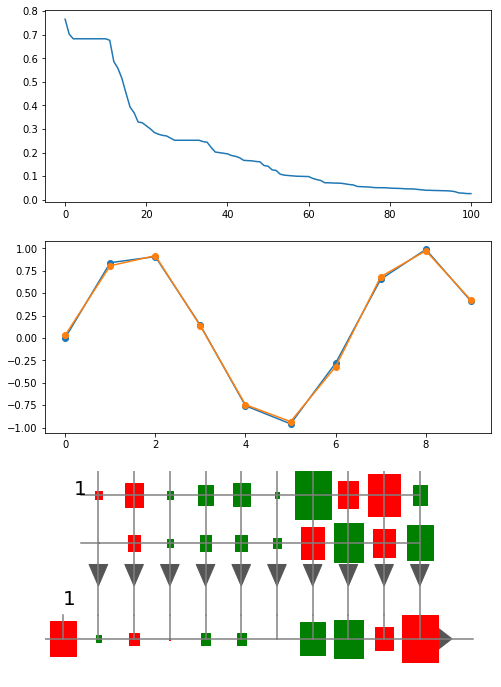

In [30]:
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(nnet.getErrors())

plt.subplot(3, 1, 2)
plt.plot(X, T, 'o-', label='Actual')
plt.plot(X, nnet.use(X), 'o-', label='Predicted')

plt.subplot(3, 1, 3)
nnet.draw()

## Neural Network Performance with Different Hidden Layer Structures and Numbers of Training Iterations

### Example with Toy Data

Using your new ```NeuralNetwork``` class, you can compare the error obtained on a given data set by looping over various hidden layer structures.  Here is an example using the simple toy data from above.

In [71]:
import random

nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

In [72]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((8, 1), (8, 1), (2, 1), (2, 1))

In [8]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

In [9]:
import pandas as pd

errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]


NameError: name 'nn' is not defined

For this data and shuffling [5,5,5] had the lowest error at 0.452351. 
The hightest error being 0.871766 for [1,1]. 
The range of rmse's for the test data was .419415. 
The median error value was 0.6325965. The above graph is used to show the hidden layer in the randomized toy data. 

[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
      0             1         2
0    10  5.946954e-01  0.928381
1    20  3.808722e-01  0.627618
2    50  2.491799e-01  0.486810
3   100  3.614986e-02  0.139668
4   150  8.400723e-04  0.142128
5   200  1.636293e-07  0.288094
6   250  4.258711e-09  0.313465
7   300  2.123040e-14  0.010893
8   350  5.172991e-15  0.024900
9   400  1.802457e-13  0.128854
10  450  2.495160e-08  0.150608
11  500  3.431071e-15  0.183418


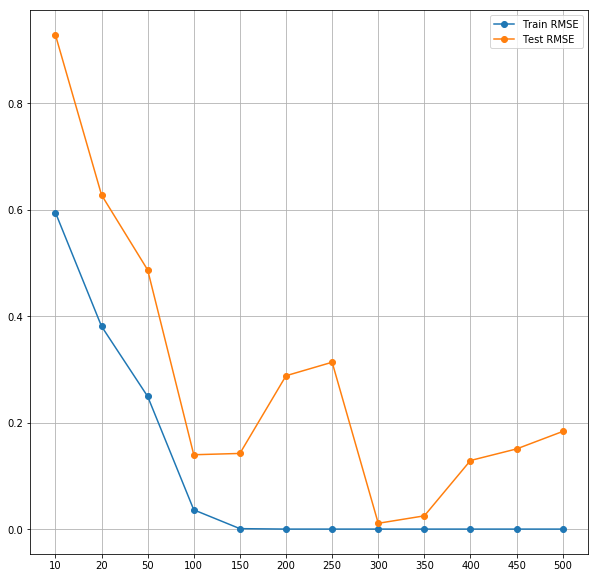

In [77]:
import pandas as pd
errors = []
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
hiddens = [20,20,20,20] #[0] + [nu * nl for nu in nIterationsList for nl in [1]]

for hids in nIterationsList: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hiddens, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, hids)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])

errors = pd.DataFrame(errors)



print(nIterationsList)
print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) #, rotation=30, horizontalalignment='right')
plt.grid(True)

In [41]:
X = np.arange(300).reshape((-1, 3))
T = X[:,0:2] + 0.1 * X[:,1:2] * X[:,2:3]
print(T.shape)
print(X.shape)
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(3, [10], 2)
print(nnet.activation(-0.8))
print(nnet)
nnet.train(X, T, 100)
error = np.sqrt(np.mean((T - nnet.use(X))**2))

(100, 2)
(100, 3)
-0.664036770268
NeuralNetwork(3, [10], 2)  Network is not trained.


### Experiments wtih Automobile Data

Now, repeat the above steps with the automobile mpg data we have used before.  Set it up to use 

  * cylinders,
  * displacement,
  * weight,
  * acceleration,
  * year, and
  * origin
  
as input variables, and

  * mpg
  * horsepower
  
as output variables.

In [3]:
def makeMPGData(filename='auto-mpg.data'):
    np.set_printoptions(suppress=True)

    def missingIsNan(s):
        return np.nan if s == b'?' else float(s)
    data = np.loadtxt(filename, usecols=range(8), converters={3: missingIsNan}) # This chunk of code flags the input with nan values
    goodRowsMask = np.isnan(data).sum(axis=1) == 0
    data = data[goodRowsMask,:]
    
    X = data[:,1:3]
    otherX = data[:,4:]                  # This chunk of code takes the specific input values to be trained from data[]
    X = np.hstack((X,otherX))
    
    T = data[:,0:1]
    otherT = data[:,3:4]                 # This chunk of code takes the specific Target values from data[]
    T = np.hstack((T, otherT))
    
    Xnames =  ['cylinders','displacement','weight','acceleration','year','origin']
    Tnames = ['mpg', 'horsepower']
    return X,T,Xnames,Tnames

In [4]:
# This line calls the previous method and stores the values that will be trained
X,T,Xnames,Tname = makeMPGData()

In [5]:
print("Shape of Target data: ", T.shape)
print("Shape of Input data: ", X.shape)
import neuralnetworksA2 as nn2

nnet = nn2.NeuralNetwork(6, [10,10,10], 2)
#print(nnet.activation(-0.8))
#print(nnet)

nnet.train(X, T, 100, verbose=True)
print(nnet)
error = np.sqrt(np.mean((T - nnet.use(X))**2))
#print(error)


Shape of Target data:  (392, 2)
Shape of Input data:  (392, 6)
SCG: Iteration 10 fValue Eval 0.0811221314016 Scale 3.90625e-09
SCG: Iteration 20 fValue Eval 0.0638885296882 Scale 3.814697265625e-12
SCG: Iteration 30 fValue Eval 0.0539387561798 Scale 3.725290298461914e-15
SCG: Iteration 40 fValue Eval 0.0500416104328 Scale 1e-15
SCG: Iteration 50 fValue Eval 0.047183963165 Scale 1e-15
SCG: Iteration 60 fValue Eval 0.0442084755993 Scale 1e-15
SCG: Iteration 70 fValue Eval 0.0414346917348 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.0399178346596 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.0375306062452 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.0361796848554 Scale 1e-15
NeuralNetwork(6, [10, 10, 10], 2)
   Network was trained for 101 iterations that took 0.3125 seconds. Final error is 0.19020958139748964.


In [6]:
import random

nRows = X.shape[0]
rows = np.arange(nRows)
np.random.shuffle(rows)
nTrain = int(nRows * 0.8)
trainRows = rows[:nTrain]
testRows = rows[nTrain:]
Xtrain, Ttrain = X[trainRows, :], T[trainRows, :]
Xtest, Ttest = X[testRows, :], T[testRows, :]

In [ ]:
import pandas as pd
errors = []
hiddens = [0] + [[nu] * nl for nu in [1, 5, 10, 20, 50] for nl in [1, 2, 3, 4, 5]]
print('hiddens =', hiddens)
for hids in hiddens: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hids, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, 500)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])
errors = pd.DataFrame(errors)
print(errors)

plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

hiddens = [0, [1], [1, 1], [1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1, 1], [5], [5, 5], [5, 5, 5], [5, 5, 5, 5], [5, 5, 5, 5, 5], [10], [10, 10], [10, 10, 10], [10, 10, 10, 10], [10, 10, 10, 10, 10], [20], [20, 20], [20, 20, 20], [20, 20, 20, 20], [20, 20, 20, 20, 20], [50], [50, 50], [50, 50, 50], [50, 50, 50, 50], [50, 50, 50, 50, 50]]


[10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
       0          1          2
0     10  12.437825  11.512600
1     20  12.781125  10.869842
2     50   9.028608   9.675401
3    100   7.695075   8.816207
4    150   6.674003   7.312120
5    200   7.274840   8.287914
6    250   6.202154   6.863483
7    300   6.782104   7.944668
8    350   5.855042   7.112226
9    400   6.139439   8.462294
10   450   6.055614   7.853378
11   500   6.195998   8.046371
12  1000   6.299126   8.736687


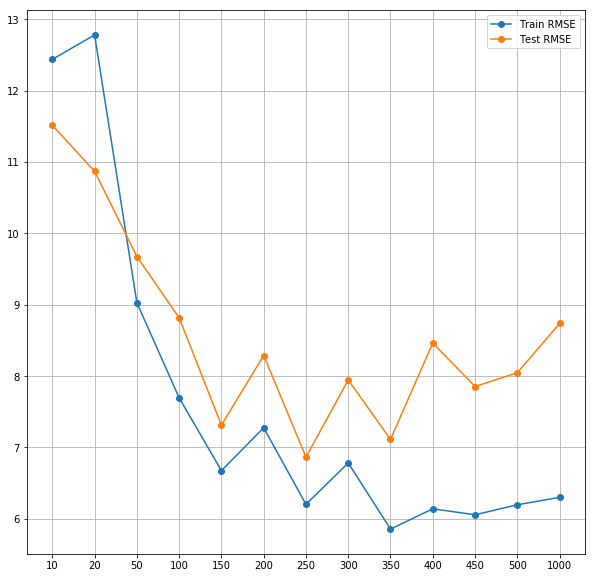

In [96]:
import pandas as pd
errors = []
nIterationsList = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000]
hiddens = [5,5,5,5] 

for hids in nIterationsList: 
    nnet = nn2.NeuralNetwork(Xtrain.shape[1], hiddens, Ttrain.shape[1])
    nnet.train(Xtrain, Ttrain, hids)
    errors.append([hids, rmse(Ttrain, nnet.use(Xtrain)), rmse(Ttest, nnet.use(Xtest))])

errors = pd.DataFrame(errors)
#  ...  insert code here using the code in the previous code block as a guide ...

print(nIterationsList)
print(errors)
plt.figure(figsize=(10, 10))
plt.plot(errors.values[:, 1:], 'o-')
plt.legend(('Train RMSE', 'Test RMSE'))
plt.xticks(range(errors.shape[0]), nIterationsList) #, rotation=30, horizontalalignment='right')
plt.grid(True)

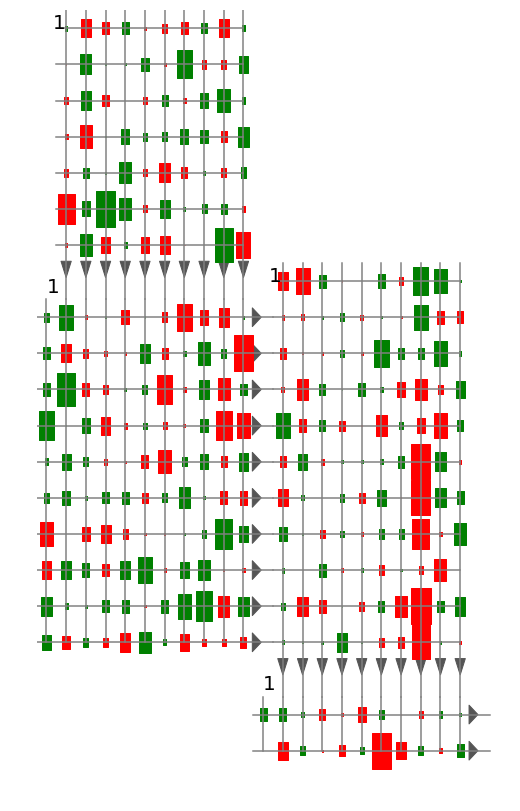

In [8]:
plt.figure(figsize=(100, 100))

#plt.subplot(6, 10, 2)
#plt.plot(nnet.getErrors())

plt.subplot(6,10,3)
nnet.draw()

Include the code, output, and graphs like the above examples. Discuss the results.  Investigate and discuss how much the best hidden layer structure and number of training iterations vary when you repeat the runs.

## Grading and Check-in

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs445/notebooks/A2grader.tar) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of  60 / 60 if your functions and class are defined correctly. The remaining 40 points will be based on the results you obtain from the comparisons of hidden layer structures and numbers of training iterations on the automobile data.

For the grading script to run correctly, you must first name this notebook as `Lastname-A2.ipynb` with `Lastname` being your last name, and then save this notebook.  Your working director must also contain `neuralnetworksA2.py` and `mlutilities.py` from lecture notes.

Combine your notebook and `neuralnetworkA2.py` into one zip file or tar file.  Name your tar file `Lastname-A2.tar` or your zip file `Lastname-A2.zip`.  Check in your tar or zip file using the `Assignment 2` link in Canvas.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include other tests.

In [ ]:
%run -i A2grader.py

## Extra Credit

Repeat the comparisons of hidden layer structures and numbers of training iterations on a second data set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml).